<a href="https://colab.research.google.com/github/dwsmithPhys/PY580_ML_S2023/blob/main/DWS_NB3_CVI_linreg_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3: Linear Regression (Diabetes)

## Learning Goal  
The goal of this notebook is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting. We will see that it is much more difficult to get good out-of-sample performance on a test set (predicting) than it is to get good in-sample performance on the training set (fitting).

## Overview:

In Notebook 1: __Section II: Machine Learning is difficult__, we explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see how learning and prediction can be improved by introducing regularization. We will focus mainly on simple applications of linear regression: minimizing the mean-square-error (MSE) on the training data (i.e. in-sample error) and see how well we perform on the test data (i.e. out-of-sample error). 


As we discussed in Sec. II of the review, there is a fundamental difference between minimizing the in-sample error and minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider ordinary least squares regression problem in which the "error function" is defined as the square from the deviation of our linear predictor to the true response. We will supplement this error function with a regularizer that prevents overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined in-sample error + regularization terms is the same as the <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distribution is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is  often not done (for computational and practical reasons).



## Least squares linear regression: 

Consider data of the form $(y_i,\mathbf{x}^{(i)})$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}^{(i)}$ is a $p$-dimensional feature (row) vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows, $\textbf{x}^{(1)},\cdots, \textbf{x}^{(n)}$, are the examples and columns, $\mathbf{X}_{:,1},\cdots, \mathbf{X}_{:,p}$,  are the measured "features" (i.e. feature predictors). We also denote the $n$-dimensional column vector of sample $i$ as $\mathbf{y}_i$ and the $p$-dimensional column vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the square loss cost function:

$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\textbf{Xw}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}),
$$

or equivalently, in component form,
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

If rank$(\mathbf{X})=p$, namely, the feature predictors $\mathbf{X}_{:,1},\cdots \mathbf{X}_{:,p}$ are linearly independent, then there exists unique solution to this problem:

$$
\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}
$$

### Exercise 1: ###  
<ul>

<font color = default>
<li> This choice of parameters correspond the maximum likehood estimate of which Likelihood function? 

<font color = red>The log-likelihood function $\hat\Theta \equiv \underset{\theta}{arg max} \log p(\mathcal{D}|\theta)$.  Our cost fucntion is the $L_2$ norm of the predicted value given the fit parameters and the actual data point: $||data-fit||_2.$

<font color = default>
<li> Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.

<font color = red>
\begin{aligned}
  ||X\textbf{w}-y||^2_2 & = (X\textbf{w}-y)^T(X\textbf{w}-y)\\
  & = (X\textbf{w})^TX\textbf{w} - y^TX\textbf{w} - (X\textbf{w})^Ty + y^Ty\\
  & = \textbf{w}^TX^TX\textbf{w} - y^TX\textbf{w} - \textbf{w}^TX^Ty + y^Ty\\
  & = \textbf{w}^TX^TX\textbf{w} - 2\textbf{w}^TX^Ty + y^Ty
\end{aligned}
<font color = red>
To get the minimum, we take the gradient with repsect to $w$ and set to 0:
<font color = red>
\begin{aligned}
  \implies 0 & = 2X^TX\hat{\textbf{w}} - 2X^Ty\\
  2X^TX\hat{\textbf{w}} & = 2X^Ty\\
  (X^TX)^{-1}X^TX\hat{\textbf{w}} & = (X^TX)^{-1}X^Ty\\
  \hat{\textbf{w}} & = (X^TX)^{-1}X^Ty\\
\end{aligned}

<font color = default>
<li> Is $\hat{\textbf{w}}$ a biased or an unbiased estimator? In other words, does it give the correct answer as the number of data points goes to infinity ($n \rightarrow \infty$). To answer this question, you may assume i.i.d. (independent, identically distributed) samples $(y_i,\textbf{x}^{(i)})$.

<font color = red> $\hat{\textbf{w}}$ is an biased estimater.  The bias comes from the model used.  If that model is not expressive enough, then the hyperplane spanned by the columns of $X$ will not contain response vector so even the optimal projector $\left(P = X(X^TX)^{-1}X^T\right)$ trained on infinite data  will not be able to return the response vector.  This is nicely demostrated graphically in Figure 11 of the text.  That said, if the model does have at least as many parameters as needed to be expressive enough, then $\hat{\textbf{w}}$ will be unbiased as there will be no sampling errors with infinite data.

<font color = default>

<li> Is $\hat{\textbf{w}}$ still well-defined when rank$(\mathbf{X})<p$? This happens when, for example, $n<p$. 

<font color = red> $\hat{\textbf{w}}$ is not still well defined since the inverse is not well defined.


<font color = default>

<li> Now imagine the samples are generated in the following manner: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}+\epsilon_i$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. In statistics, the in-sample risk is defined as
$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$
where $\mathbb{E}[\cdots]$ is taken over all i.i.d pairs $(y_i,\textbf{x}^{(i)})$ and $\hat{\textbf{w}}$ is the least squares solution given above. Assuming that $\mathbf{X}$ and $\epsilon_i$ are independent, show that the risk is given by
<font color = default>
$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true}) = \sigma^2\frac{p}{n}
$$
What's the implication of this for fixed $p$ as $n \rightarrow \infty$? How about when $p,n$ scale together?

<font color = red> If $y=X\textbf{w}_{true} + ϵ,$ where $ϵ$ has a mean of zero and a variance of $\sigma^2$ we can do the folllowing:
<font color = red>
\begin{aligned}
\mathbb{E}\left[(X\hat{\textbf{w}}-X\textbf{w}_{true})^2\right] & = \mathbb{E}\left[(X\hat{\textbf{w}}-X\textbf{w}_{true})^T(X\hat{\textbf{w}}-X\textbf{w}_{true})\right]\\
& = \mathbb{E}\left[X^2\hat{\textbf{w}}^2\right] - \mathbb{E}\left[X^2\textbf{w}_{true}^T\hat{\textbf{w}}\right] - \mathbb{E}\left[X^2\hat{\textbf{w}}^T\textbf{w}_{true}\right] + \mathbb{E}\left[X^2\textbf{w}_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2+ϵ^2\right] - \mathbb{E}\left[X^2(X^{-1}y_{true})^T(X^TX)^{-1}X^Ty)\right] - \mathbb{E}\left[X^2\hat{\textbf{w}}^T\textbf{w}_{true}\right] + \mathbb{E}\left[y_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2+ϵ^2\right] - \mathbb{E}\left[X^2(X^2)^{-1}y_{true}^Ty)\right] - \mathbb{E}\left[X^2\hat{\textbf{w}}^T\textbf{w}_{true}\right] + \mathbb{E}\left[y_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2+ϵ^2\right] - 2\mathbb{E}\left[y_{true}\cdot y\right] + \mathbb{E}\left[y_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2\right]+\mathbb{E}\left[ϵ^2\right] - 2\mathbb{E}\left[(y_{true}+\epsilon)\cdot y_{true}\right] + \mathbb{E}\left[y_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2\right]+\mathbb{E}\left[ϵ^2\right] - 2\mathbb{E}\left[y_{true}^2\right] - 2\mathbb{E}\left[\epsilon\cdot y_{true}\right] + \mathbb{E}\left[y_{true}^2\right]\\
& = \mathbb{E}\left[y_{true}^2\right]+\mathbb{E}\left[ϵ^2\right] - 2\mathbb{E}\left[y_{true}^2\right] - 2\mathbb{E}\left[\epsilon\right]\mathbb{E}\left[y_{true}\right] + \mathbb{E}\left[y_{true}^2\right]\\
\space
\end{aligned}
\begin{aligned}
\implies \mathbb{E}\left[(X\hat{\textbf{w}}-X\textbf{w}_{true})^2\right] = p\sigma^2\\
\implies R(\hat{\textbf{w}}, \textbf{w}_\text{true}) = \sigma^2\frac{p}{n} \checkmark
\end{aligned}

<font color = red> When $n→∞$, the in-sample and out-sample errors converge to a single value.  When $n$ and $p$ scale together, the two errors do not converge to a single value; your out-sample error will always be worse than your in-sample error.  You are unable to learn to the point where you are limited by the bias of your model.
<font color = default>

</ul>




From Exercise 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(\mathbf{X})>p$. But even so we still may not want to use least squares if $p$ is moderately close to $n$, because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression</b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).


## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Exercise 2: ###  
<ul>
<font color = default>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?

<font color = red> $P(\textbf{w}) = \frac{e^{-\frac{\lambda |\textbf{w}|^2}{2}}}{\left(\sqrt{2\pi \lambda}\right)^p}$

<font color = default>
<li>Show that the solution to Ridge regression is given by $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$. 

<font color = red> From least-squares regression we have that
\begin{aligned}
  ||X\textbf{w}-y||^2_2 & = \textbf{w}^TX^TX\textbf{w} - 2\textbf{w}^TX^Ty + y^Ty\\
  \implies||X\textbf{w}-y||^2_2+\lambda||\textbf{w}||^2_2 & = \textbf{w}^TX^TX\textbf{w} - 2\textbf{w}^TX^Ty + y^Ty + \lambda\textbf{w}^2 \\
\end{aligned}
<font color = red>
To get the minimum, we take the gradient with repsect to $w$ and set to 0:
<font color = red>
\begin{aligned}
  \implies 0 & = 2X^TX\hat{\textbf{w}} - 2X^Ty + 2\lambda\hat{\textbf{w}}\\
  2X^TX\hat{\textbf{w}} + 2\lambda\hat{\textbf{w}} & = 2X^Ty\\
  (X^TX + \lambda I)\hat{\textbf{w}} & = X^Ty\\
  \implies \hat{\textbf{w}}_{ridge} & = (X^TX + \lambda I)^{-1}X^Ty\checkmark
\end{aligned}

<font color = default>
<li>Express your answer in terms of the Singular Value Decomposition of $\mathbf{X}$.

<font color = red>
\begin{aligned}
  X = UDV^T\\
  X^T = VDU^T\\
  \implies\hat{\textbf{w}}_{ridge} = (X^TX + \lambda I)^{-1}X^Ty &=(VDU^TUDV^T + \lambda I_{pxp})^{-1}VDU^Ty\\
  & = (VD^2V^T+V\lambda I V^T)^{-1}VDU^Ty\\
  & = V(D^2+\lambda I)^{-1}V^TVDU^Ty\\
  \implies\hat{\textbf{w}}_{ridge} = V(D^2+\lambda I)^{-1}DU^Ty
\end{aligned}

<font color = default>
</ul>

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Note the prefactor $1/(2n)$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with the Scikit-Learn package in Python. As we discussed in the main text, LASSO tends to give sparse solution. In the following we're going to explore these ideas a little bit more.


### Exercise 3: ###  
<ul>
<font color = default>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?

<font color = red> $P(\textbf{w}) = \frac{e^{-\frac{\lambda |\textbf{w}|}{2}}}{\left(\sqrt{2\pi \lambda}\right)^p}$

<font color = default>
<li>In this case, can you derive an analytic expression for $\mathbf{w}_{LASSO}$? Do you have any ideas about how we might be able to efficiently numerically calculate this? 

<font color = red> In the case of orthogonal X
\begin{aligned}
&\qquad\hat{\textbf{w}}_{OLS} = X^Ty\\
{1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 & = {1\over 2n}y^Ty - {1\over n}y^TX\textbf{w} + {1\over 2n}\textbf{w}^T\textbf{w} + \lambda ||\mathbf{w}||_1\\
& = {1\over 2n}y^Ty - {1\over n}\hat{\textbf{w}}_{OLS}\textbf{w} + {1\over 2n}||\textbf{w}||^2 + \lambda ||\mathbf{w}||_1\\
\end{aligned}
<font color = red> Take the gradient with respect to $\textbf{w}$ and set to 0 to find minimum
\begin{aligned}
0 & = -\hat{\textbf{w}}_{OLS} + ||\textbf{w}|| + \lambda\text{sign}(\textbf{w})\\
\implies ||\textbf{w}|| & = \hat{\textbf{w}}_{OLS} - \lambda\text{sign}(\textbf{w})
\end{aligned}
<font color = red> To get the actual value of $\textbf{w}$, we must consider that $\hat{\textbf{w}}_{OLS}$ and $\textbf{w}$ must have the same sign in order to ensure a minimum is reached.
$$
\implies \textbf{w} = \text{sign}(\hat{\textbf{w}}_{OLS})(|\hat{\textbf{w}}_{OLS}| - \lambda)^+
$$

<font color = red> But, we are not generally in the condition of orthogonal X, in which case, we cannot analytically solve for $\hat{\textbf{w}}_{LASSO}$.  To calculate numerically, we can used the gradiant descent methods we discussed earlier.

<font color = default>
<li> Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$)

<font color = red> For $\lambda = 0 \text{ or } \infty$, LASSO and Ridge will gave the same asnwer.  If 0, they just revert back to ordinary least-squares regression.  If $\infty$, $\textbf{w}$ will minimize to 0.  In between, ridge and LASSO do give different answers.  Since the ridge regularizer punishes small norms less strongly (say $|\textbf{w}| = 0.1$, then $0.1^2<0.1^1$), it will have more small-valued parameters whereas LASSO will have more parameters that are identically 0.
</ul>

## Numerical Experiments with Ridge Regression and LASSO##

We will now perform some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for Ridge Regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>). In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.


Automatically created module for IPython interactive environment
---------------------------------------------
n_samples_train=
30


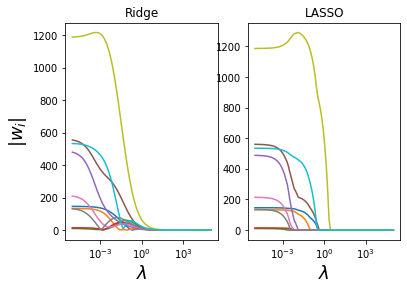

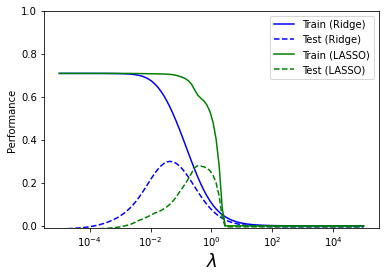

---------------------------------------------
n_samples_train=
40


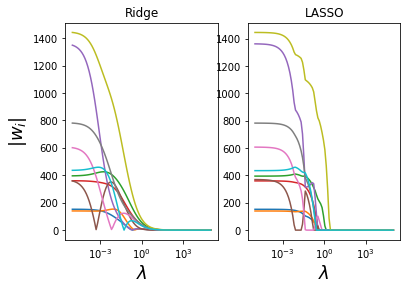

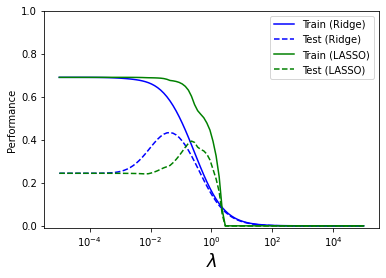

---------------------------------------------
n_samples_train=
50


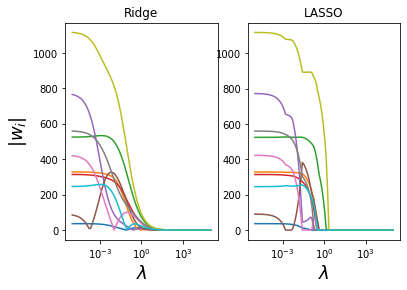

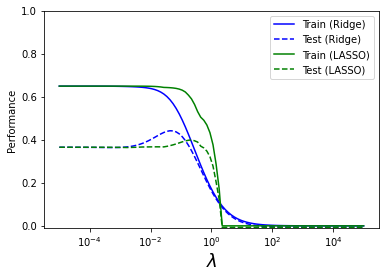

---------------------------------------------
n_samples_train=
60


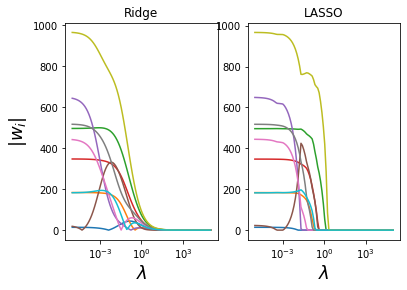

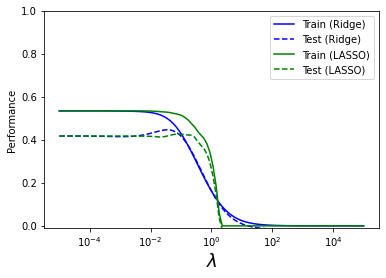

---------------------------------------------
n_samples_train=
70


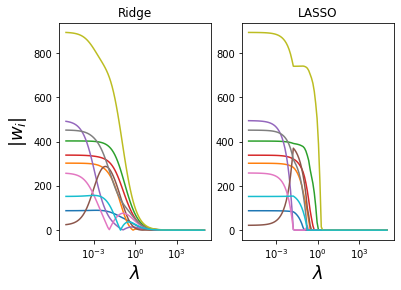

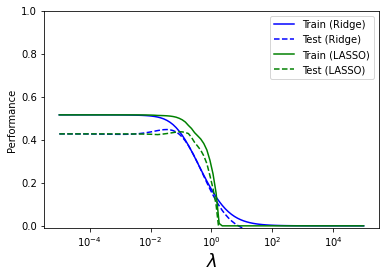

---------------------------------------------
n_samples_train=
80


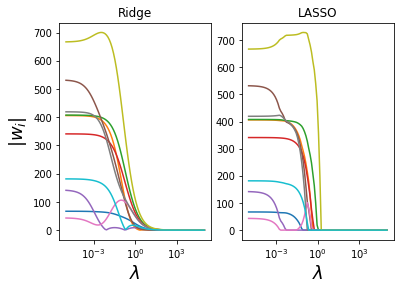

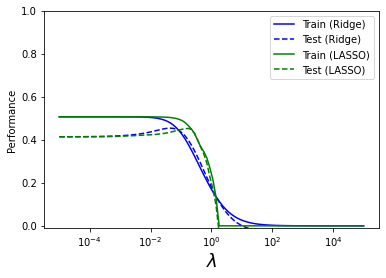

---------------------------------------------
n_samples_train=
90


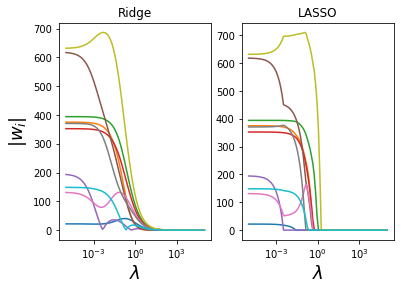

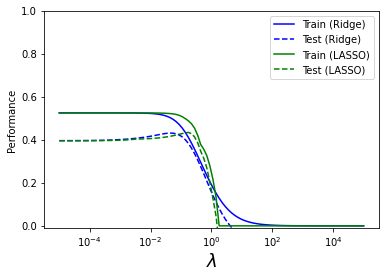

---------------------------------------------
n_samples_train=
100


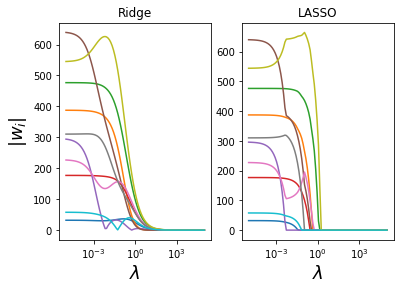

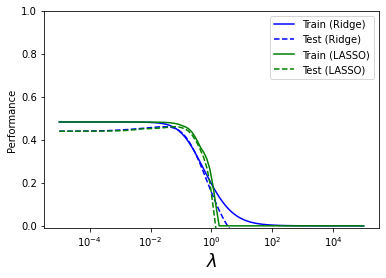

---------------------------------------------
n_samples_train=
110


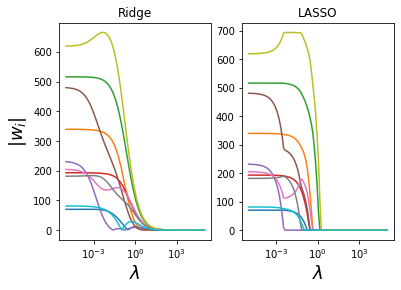

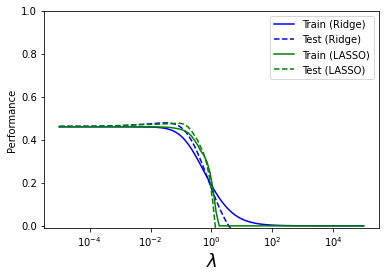

---------------------------------------------
n_samples_train=
120


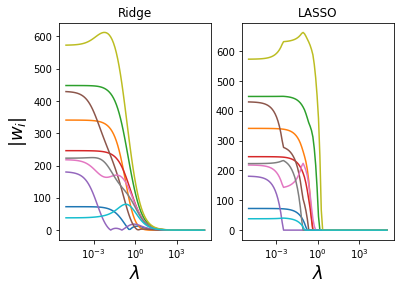

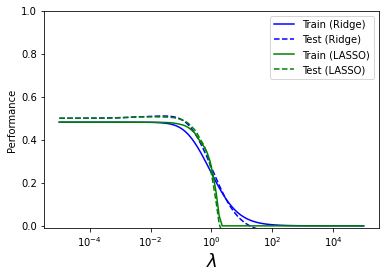

---------------------------------------------
n_samples_train=
130


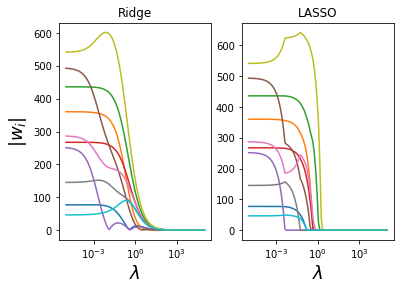

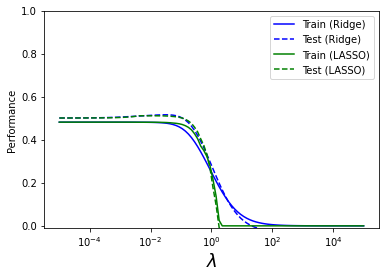

---------------------------------------------
n_samples_train=
140


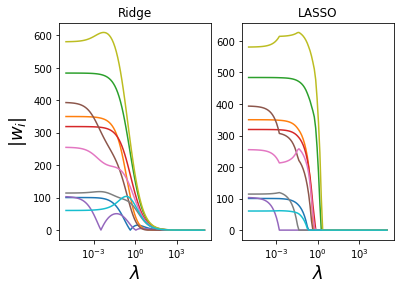

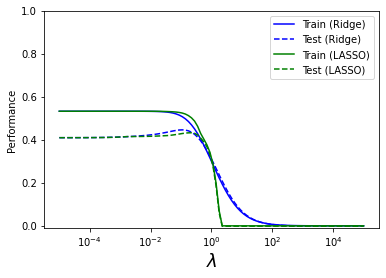

---------------------------------------------
n_samples_train=
150


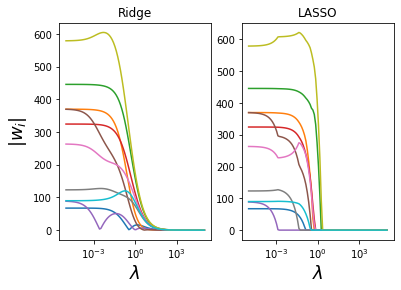

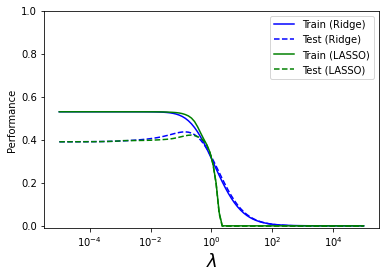

---------------------------------------------
n_samples_train=
160


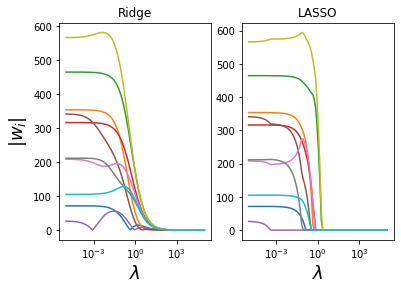

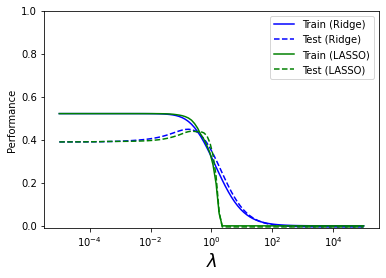

---------------------------------------------
n_samples_train=
170


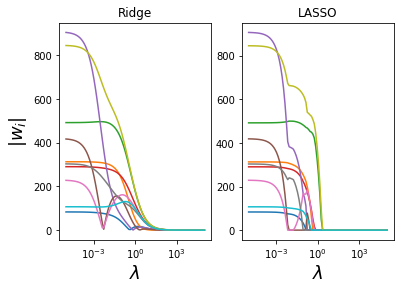

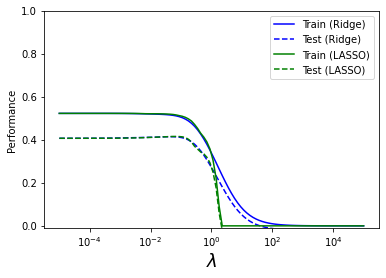

In [33]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-5, 5, 100)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 30
for n_samples_train in [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]:
  print("---------------------------------------------")
  print("n_samples_train=")
  print(n_samples_train)
  X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
  y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
  train_errors_ridge = list()
  test_errors_ridge = list()

  train_errors_lasso = list()
  test_errors_lasso = list()



  # Initialize coeffficients for ridge regression and Lasso

  coefs_ridge = []
  coefs_lasso = []
  for a in alphas:
      ridge.set_params(alpha=a)
      ridge.fit(X_train, y_train)
      coefs_ridge.append(ridge.coef_)
      
      # Use the coefficient of determination R^2 as the performance of prediction.
      train_errors_ridge.append(ridge.score(X_train, y_train))
      test_errors_ridge.append(ridge.score(X_test, y_test))
      
      lasso.set_params(alpha=a)
      lasso.fit(X_train, y_train)
      coefs_lasso.append(lasso.coef_)
      train_errors_lasso.append(lasso.score(X_train, y_train))
      test_errors_lasso.append(lasso.score(X_test, y_test))
      
  ###############################################################################
  # Display results

  # First see how the 10 features we learned scale as we change the regularization parameter
  plt.subplot(1,2,1)
  plt.semilogx(alphas, np.abs(coefs_ridge))
  axes = plt.gca()
  #ax.set_xscale('log')
  #ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel(r'$\lambda$',fontsize=18)
  plt.ylabel('$|w_i|$',fontsize=18)
  plt.title('Ridge')
  #plt.savefig("Ridge_sparsity_scale.pdf.pdf")



  plt.subplot(1,2,2)
  plt.semilogx(alphas, np.abs(coefs_lasso))
  axes = plt.gca()
  #ax.set_xscale('log')
  #ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel(r'$\lambda$',fontsize=18)
  #plt.ylabel('$|\mathbf{w}|$',fontsize=18)
  plt.title('LASSO')
  #plt.savefig("LASSO_sparsity_scale.pdf")
  plt.show()



  # Plot our performance on both the training and test data
  plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
  plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
  plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
  plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
  #plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
  #           linewidth=3, label='Optimum on test')
  plt.legend(loc='upper right')
  plt.ylim([-0.01, 1.0])
  plt.xlabel(r'$\lambda$',fontsize=18)
  plt.ylabel('Performance')
  #plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
  plt.show()





### Exercise 4: ###  
<ul>
<font color = default>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?

<font color = red> $\lambda = 0$ corresponds to least-squares regression.  At $\lambda = 10^5$, you are to the point where you have over-regularized the regression and drive all the parameter weights to 0.  Since the parameters are not independent on one another, you would expect some complex, not-necessarily-monotonic behavior for the weights as they get shifted around by the regularizer.  It is not inconceivable that a feature will become more important as another related feature becomes less important.

<font color = default>
<li>Make a similar regularization plot for LASSO? 

<font color = red> $\checkmark$

<font color = default>
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?

<font color = red> Ridge leads to smoother paths; as the strength of the regularizer increases the parameters smoothing decay to 0.  Lasso, on the other had, is much more drastic; once the regularizer reaches a threshold, the parameter gets turned fully off very quickly.  This makes sense as LASSO is good for sparse parameter spaces and thus is trying to set parameters to 0 where as ridge is just trying to set parameteres to small values.

<font color = default>
<li>How do your answers change when you vary the number of examples and training set size?

<font color = red> When you have a lot of training data and not that much test data, ridge and LASSO do similarly well.  Ridge is otherwise a bit better except when the training data and test data sets are very similar is size.
</ul>

## A brief note about convexity##

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)x \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer</b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution. The LASSO solution is unique under general conditions, for example, when $X$ has columns in <i> general position </i> (see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

Automatically created module for IPython interactive environment
------------------------------------------------------------------------------------------
n_samples_train =
170
$\lambda$ =
10^1
L1 ratio =
0 to 1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.898e+05, tolerance: 9.798e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


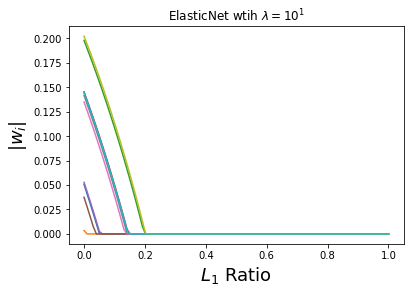

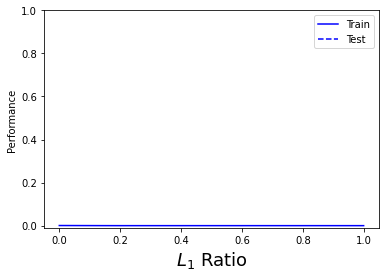

------------------------------------------------------------------------------------------
n_samples_train =
30
$\lambda$ =
10^{-2}
L1 ratio =
0 to 1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.117e+04, tolerance: 1.200e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


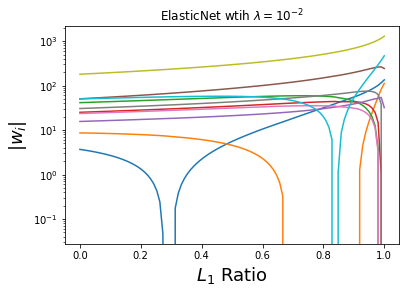

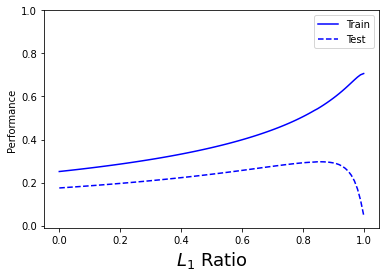

------------------------------------------------------------------------------------------
n_samples_train =
110
$\lambda$ =
10^{-1}
L1 ratio =
0 to 1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+05, tolerance: 5.276e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


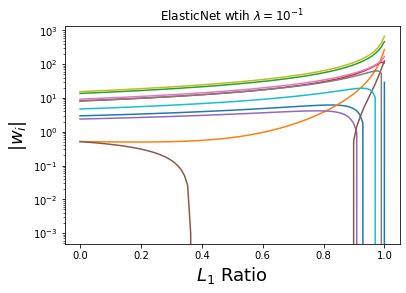

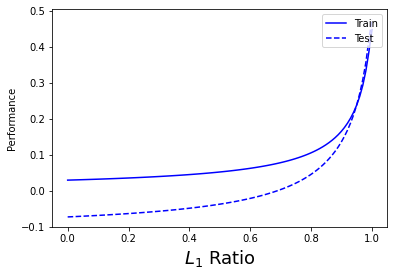

In [53]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
elasticNet = linear_model.ElasticNet()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
a = 10**(1)
L1_ratios = np.linspace(0,1,100)

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 170
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^1")
print("L1 ratio =")
print("0 to 1")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for L1r in L1_ratios:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.plot(L1_ratios, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $\lambda = 10^{1}$')
plt.show()



# Plot our performance on both the training and test data
plt.plot(L1_ratios, train_errors_elasticNet, 'b',label='Train')
plt.plot(L1_ratios, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
a = 10**(-2)
L1_ratios = np.linspace(0,1,100)

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 30
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-2}")
print("L1 ratio =")
print("0 to 1")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for L1r in L1_ratios:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogy(L1_ratios, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $\lambda = 10^{-2}$')
plt.show()



# Plot our performance on both the training and test data
plt.plot(L1_ratios, train_errors_elasticNet, 'b',label='Train')
plt.plot(L1_ratios, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
a = 10**(-1)
L1_ratios = np.linspace(0,1,100)

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 110
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-1}")
print("L1 ratio =")
print("0 to 1")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for L1r in L1_ratios:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogy(L1_ratios, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $\lambda = 10^{-1}$')
plt.show()



# Plot our performance on both the training and test data
plt.plot(L1_ratios, train_errors_elasticNet, 'b',label='Train')
plt.plot(L1_ratios, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$L_1$ Ratio',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

Automatically created module for IPython interactive environment
------------------------------------------------------------------------------------------
n_samples_train =
130
$\lambda$ =
10^{-5} to 10^5
L1 ratio =
0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+03, tolerance: 6.688e+01
  model = cd_fast.enet_coordinate_descent(


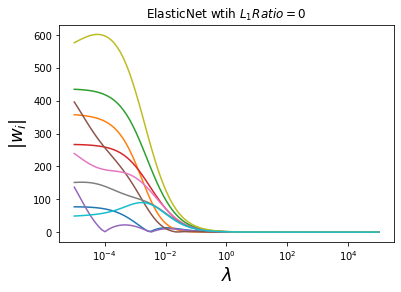

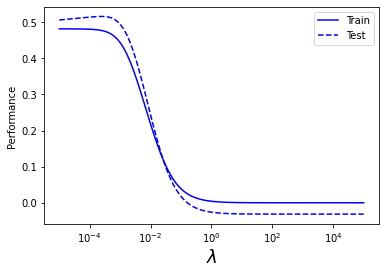

------------------------------------------------------------------------------------------
n_samples_train =
130
$\lambda$ =
10^{-5} to 10^5
L1 ratio =
0.25


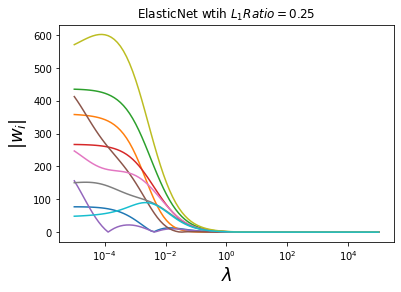

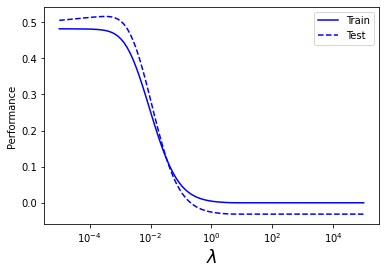

------------------------------------------------------------------------------------------
n_samples_train =
130
$\lambda$ =
10^{-5} to 10^5
L1 ratio =
0.5


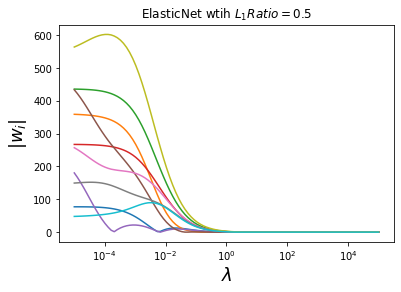

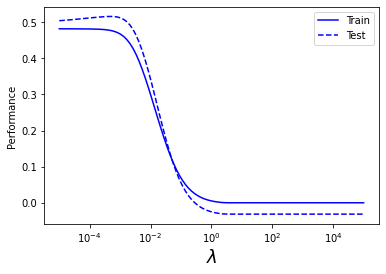

------------------------------------------------------------------------------------------
n_samples_train =
130
$\lambda$ =
10^{-5} to 10^5
L1 ratio =
0.75


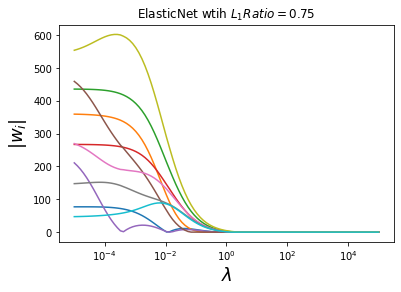

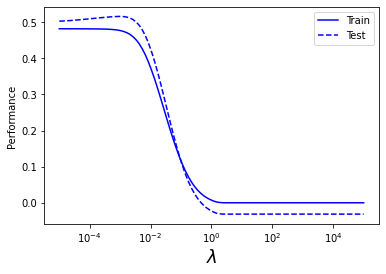

------------------------------------------------------------------------------------------
n_samples_train =
130
$\lambda$ =
10^{-5} to 10^5
L1 ratio =
1


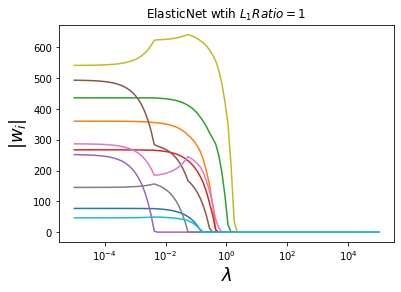

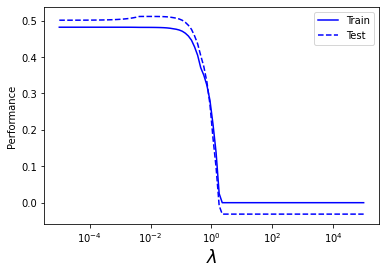

In [62]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
elasticNet = linear_model.ElasticNet()

# Chooose paths
alphas = np.logspace(-5, 5, 100)
L1_ratios = np.linspace(0,1,100)
L1r = 10**(-7)

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 130
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-5} to 10^5")
print("L1 ratio =")
print("0")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for a in alphas:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogx(alphas, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $L_1 Ratio = 0$')
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_elasticNet, 'b',label='Train')
plt.semilogx(alphas, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()



# Chooose paths
alphas = np.logspace(-5, 5, 100)
L1_ratios = np.linspace(0,1,100)
L1r = 0.25

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 130
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-5} to 10^5")
print("L1 ratio =")
print("0.25")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for a in alphas:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogx(alphas, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $L_1 Ratio = 0.25$')
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_elasticNet, 'b',label='Train')
plt.semilogx(alphas, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
L1_ratios = np.linspace(0,1,100)
L1r = 0.5

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 130
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-5} to 10^5")
print("L1 ratio =")
print("0.5")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for a in alphas:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogx(alphas, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $L_1 Ratio = 0.5$')
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_elasticNet, 'b',label='Train')
plt.semilogx(alphas, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
L1_ratios = np.linspace(0,1,100)
L1r = .75

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 130
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-5} to 10^5")
print("L1 ratio =")
print("0.75")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for a in alphas:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogx(alphas, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $L_1 Ratio = 0.75$')
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_elasticNet, 'b',label='Train')
plt.semilogx(alphas, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Chooose paths
alphas = np.logspace(-5, 5, 100)
L1_ratios = np.linspace(0,1,100)
L1r = 1

# To see how well we learn, we partition the dataset into a training set with 100 
# as well as a test set with 100 examples. We record their errors respectively.
n_samples_train = 130
print("------------------------------------------------------------------------------------------")
print("n_samples_train =")
print(n_samples_train)
print("$\lambda$ =")
print("10^{-5} to 10^5")
print("L1 ratio =")
print("1")

X_train, X_test = X[:n_samples_train], X[(n_samples_train):]
y_train, y_test = y[:n_samples_train], y[(n_samples_train):]
train_errors_elasticNet = list()
test_errors_elasticNet = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_elasticNet = []
for a in alphas:
  elasticNet.set_params(alpha=a, l1_ratio = L1r)
  elasticNet.fit(X_train, y_train)
  coefs_elasticNet.append(elasticNet.coef_)
  
  # Use the coefficient of determination R^2 as the performance of prediction.
  train_errors_elasticNet.append(elasticNet.score(X_train, y_train))
  test_errors_elasticNet.append(elasticNet.score(X_test, y_test))
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.semilogx(alphas, np.abs(coefs_elasticNet))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title(r'ElasticNet wtih $L_1 Ratio = 1$')
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_elasticNet, 'b',label='Train')
plt.semilogx(alphas, test_errors_elasticNet, '--b',label='Test')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
#plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

### Exercise 4: ###  
<ul>
<font color = default>
<li> Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?

<font color = red> Sparser solutions will be when $\lambda>\delta$ as this regularizer is more LASSO-like than ridge-like.  The larger the differense, the more sparse the solutions will be for lower $\lambda$.

<font color = default>
<li> Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

<font color = red> As expected, as $\lambda$ gets large and $\delta$ gets small, the elastic net solution looksmoreand more like LASSO but it is still smooth until $\lambda \gg \delta$.

<font color = default>
<li> Derive the analytic solution of this elastic net problem. Check your answer by looking at two limiting cases ($\lambda\rightarrow 0$ and $\delta\rightarrow 0$). Does this agree with what you found previously?

<font color = red>
\begin{aligned}
||X\textbf{w}-y||^2_2 + \lambda||\textbf{w}||_1 + \delta||\textbf{w}||_2^2 & = y^Ty - 2\textbf{w}X^Ty + \textbf{w}^TXX^T\textbf{w} + \lambda||\textbf{w}|| + \delta\textbf{w}^2
\end{aligned}
<font color = red> Taking the gradient with respect to $\textbf{w}$ and setting to 0 gives
\begin{aligned}
0 & = -2X^Ty + 2XX^T\textbf{w} + \lambda\text{sign}(\textbf{w}) + 2\delta\textbf{w}\\
XX^T\textbf{w} - \delta\textbf{w}& = X^Ty + \frac{1}{2}\lambda\text{sign}(\textbf{w})\\
\hat{\textbf{w}}_{elasticNet} & = (XX^T-\delta I)^{-1}(X^Ty+\frac{1}{2}\lambda\text{sign}(\textbf{w}))
\end{aligned}

<font color = red> In both the $\lambda\rightarrow 0$ and $\delta\rightarrow 0$ this gives the correct form to be consistent with LASSO and ridge.

<font color = default>
</ul>

### End-of-notebook questions ###  
<ul>

<font color = default>
<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 
<font color = default>
$$
R_{in}(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notation and assumption, now imagine if we're given a new data point $\textbf{x}_0$ independently drawn from the predictor distribution $\mathcal{P}$. We can define the out-of-sample risk as 
$$
R_{out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}_0 -\textbf{w}_\text{true}\cdot \textbf{x}_0)^2],
$$
with the expectation value taken not only over the training samples $(y_i,\textbf{x}_i)$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}^{(0)}$. One can actually show that $R_{out}\ge R_{in}$ under mild assumptions. This makes sense intuitively since it's usually harder to make prediction on unseen samples than to fit the samples given. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.

<font color = red> To answer the first three questions: in-sample error is the error between our model and the training data while out-sample error is the error between our model and the test data.  The out-sample error is the important factor for prediction while in-sample error is the important factor for fitting.  Ususally, the in-sample error is lower than the out-sample error.  But yes, it does depend on the regularization.  Some regularizations make it so that the model is better at prediction new data.
</ul>